In [8]:
import numpy as np
from random import random
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import *
from sklearn.metrics import mean_squared_error

In [34]:
def moon(num_points, distance, radius, width):
  points = num_points

  x1 = [0 for _ in range(points)]
  y1 = [0 for _ in range(points)]
  x2 = [0 for _ in range(points)]
  y2 = [0 for _ in range(points)]

  for i in range(points):
    d = distance
    r = radius
    w = width
    a = random() * math.pi
    x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + ((-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

    a = random() * math.pi + math.pi
    x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + ((-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
  return ([x1, x2, y1, y2])

def Train(dataset, epochs, learningRate):
    w = np.random.rand(2)/2 - 0.25
    mseArr = []
    for epoch in range(epochs):
        mse = 0.0
        np.random.shuffle(dataset)
        for row in dataset:
            rowLabel = row[:2]
            rowLabel = np.asarray(rowLabel)
            prediction = np.dot(w, rowLabel)
            expected = row[-1]
            error = expected - prediction
            mse += error ** 2
            w = w + learningRate*error*rowLabel

        mse /= len(dataset)
        mseArr.append(mse)

        if mse == 0:
            break
 
    return w, mseArr

def Normalize(dataset):
  normData = np.asarray(dataset)
  sumColumn = np.sum(normData[:, :2], axis=0)
  meanColumn = np.divide(sumColumn, len(dataset))
  normData[:, 0] = np.subtract(normData[:, 0], meanColumn[0])
  normData[:, 1] = np.subtract(normData[:, 1], meanColumn[1])
  maxValue = np.amax(abs(normData[:, :2]))
  normData[:, 0] = np.divide(normData[:, 0], maxValue)
  normData[:, 1] = np.divide(normData[:, 1], maxValue)
  return normData

def PlotMoon(w, data):
  class1 = data[:, 0] * w[0] + data[:, 1] * w[1] >= 0
  class1Dataset = data[class1]
  class2 = data[:, 0] * w[0] + data[:, 1] * w[1] < 0
  class2Dataset = data[class2]

  x = np.asarray([-20, 32])
  y = (-w[0] * x)/w[1]
  plt.plot(x, y, c="k")
  plt.xlim(-20, 32)
  plt.scatter(class1Dataset[:, 0], class1Dataset[:, 1], c="b", marker='x', s=20)
  plt.scatter(class2Dataset[:, 0], class2Dataset[:, 1], c="r", marker='x', s=20)
  plt.show()

def Run(dist = 1):
    x1, x2, y1, y2 = moon(1500, dist, 10, 6)

    data = []
    data.extend([x1[i], y1[i], -1] for i in range(750))
    data.extend([x2[i], y2[i], 1] for i in range(1500))
    data = np.asarray(data)
    normalizedData = Normalize(np.copy(data))

    w, mse = Train(normalizedData, 20, 0.005)

    #Plot the data points with decision boundary
    print("LMS Algorithm - Double Moon Classification with distance =", dist,": ")
    PlotMoon(w, data)

    return mse

LMS Algorithm - Double Moon Classification with distance = 1 : 


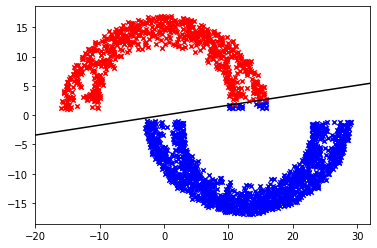

In [30]:
mse_d1 = Run()

LMS Algorithm - Double Moon Classification with distance = 0 : 


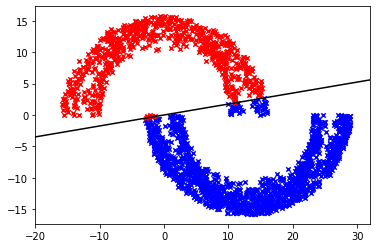

In [31]:
mse_d0 = Run(0)

LMS Algorithm - Double Moon Classification with distance = -4 : 


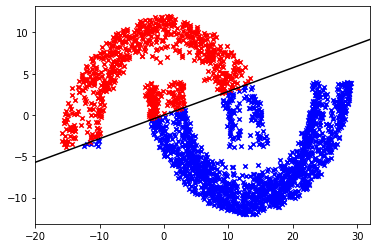

In [32]:
mse_dm4 = Run(-4)

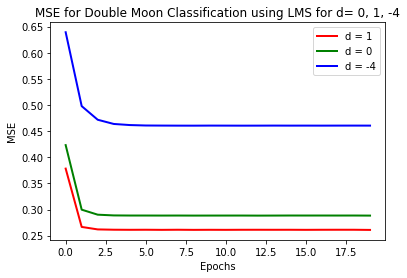

In [33]:
iters = [i for i in range(20)]
plt.plot(iters, mse_d1, color='red', linewidth=2, label="d = 1")
plt.plot(iters, mse_d0, color='green', linewidth=2,  label="d = 0")
plt.plot(iters, mse_dm4, color='blue', linewidth=2, label="d = -4")
plt.ylabel('MSE')
plt.xlabel('Epochs')

plt.title('MSE for Double Moon Classification using LMS for d= 0, 1, -4')

plt.legend()
